In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from datetime import timedelta
from notebook_utils import NotebookUtilities
from pandas import DataFrame
import humanize
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(168528, 109)



# Triage Efficiency

(how long it takes to triage the scene) What record in the FRVRS log is there that shows that the scene triage is complete?

In [4]:

# Investigate the presence of still patients
fn = lambda x: 'still' in str(x).lower()
srs = frvrs_logs_df.applymap(fn, na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
print(columns_list)
mask_series = frvrs_logs_df.voice_capture_message.map(fn)
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_capture_message.unique().tolist())
mask_series = frvrs_logs_df.voice_command_command_description.map(fn)
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_command_command_description.unique().tolist())
for cn in columns_list:
    print(cn)
    mask_series = frvrs_logs_df[cn].map(fn)
    df = frvrs_logs_df[mask_series]
    
    # Display a sample of the data frame, dropping columns with all NaN values and transposing it
    display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

['patient_demoted_sort', 'patient_record_sort', 'voice_capture_message', 'voice_command_message', 'voice_command_command_description', 'patient_engaged_sort']
['OK so you can still walk', "but he's still red tag right", 'no yeah I guess they have the other two still', "Yep still didn't work", "I'm still or obviously threat so has a pulse has", "it's still pretty fast but", "you're still having difficulty breathing", 'still here', "he's still breathing i don't feel a pulse", "so you wanna like teleport near them but not right on top now you you clearly have the hang of the other joystick that's the glide some people don't like to glide as much because your feet are stationary but you're still moving OK now on your right hip", "OK and then he's still unresponsive so he probably gets the red tag", 'now do i still have my bag OK', "well i'm still gonna make him a red tag i think cause you know i'll shoot you right i forgot to do that", 'hold still', "excellent still looks like crap let's t

,6844,29535,72503,7570
action_type,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED
elapsed_time,338085,181655,269878,9401
event_time,2023-05-12 16:55:00,2023-03-07 10:19:00,2023-05-10 09:21:00,2023-03-08 12:20:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,33e7d6b6-2868-42e6-8967-d6890efb87a7,7b239b94-a052-4a1f-929c-123a94426327,2310f107-d9d2-418e-a2d7-dd7a17924544
file_name,Clean 0b891add-e0c3-463d-948d-7f491f1d10ef.csv,Clean Marty11.csv,clean-7b239b94-a052-4a1f-929c-123a94426327.csv,Clean 2310f107-d9d2-418e-a2d7-dd7a17924544.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,1,0
patient_demoted_health_level,100,100,100,100
patient_demoted_health_time_remaining,128,Infinity,Infinity,0
patient_demoted_id,Mike_3 Root,Bob_0 Root,Gary_1 Root,Gary_3 Root


patient_record_sort


,132203,104181,32982,120701
action_type,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD
elapsed_time,220265,211677,373836,261942
event_time,2023-04-21 09:44:00,2023-06-23 10:15:00,2023-03-07 11:35:00,2023-05-31 10:25:00
session_uuid,f68ce2b4-67dc-4829-89fc-cfe478391148,a118a19a-0126-48ea-9d7b-7762f8e99926,524d5418-62f4-4834-9f1e-47202c30e667,deecd930-56c6-4679-87d8-7d6627631934
file_name,clean-max11.csv,clean-a118a19a-0126-48ea-9d7b-7762f8e99926.csv,Clean Marty16.csv,clean-deecd930-56c6-4679-87d8-7d6627631934.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,2,2,2
patient_record_health_level,100,100,100,100
patient_record_health_time_remaining,Infinity,0,Infinity,Infinity
patient_record_id,Bob_0 Root,Gary_3 Root,Bob_0 Root,Gary_1 Root


voice_capture_message


,99355,32758,59534,72238
action_type,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE
elapsed_time,488123,214692,304853,109697
event_time,2023-06-12 14:38:00,2023-03-07 11:33:00,2023-05-10 10:13:00,2023-05-10 09:18:00
session_uuid,a0987257-801e-44c5-a1ad-81e0083bfa46,524d5418-62f4-4834-9f1e-47202c30e667,2df4352b-22b9-4a9f-9c2c-6031978251e1,7b239b94-a052-4a1f-929c-123a94426327
file_name,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv,Clean Marty16.csv,clean-2df4352b-22b9-4a9f-9c2c-6031978251e1.csv,clean-7b239b94-a052-4a1f-929c-123a94426327.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,1,2,1
voice_capture_message,it's still pretty rapid but it's,well i'm still gonna make him a red tag i thin...,still don't like that cat,alright so we fixed the problem but he's still...


voice_command_message


,8083,59281,147629,32768
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,241668,119660,375704,234391
event_time,2023-03-08 12:18:00,2023-05-10 10:10:00,2023-04-21 08:24:00,2023-03-07 11:33:00
session_uuid,3878e926-44dc-4ab4-af28-d4293f0d499b,2df4352b-22b9-4a9f-9c2c-6031978251e1,ee42b183-00b2-4bb9-89b9-0b38b73e69eb,524d5418-62f4-4834-9f1e-47202c30e667
file_name,Clean 3878e926-44dc-4ab4-af28-d4293f0d499b.csv,clean-2df4352b-22b9-4a9f-9c2c-6031978251e1.csv,clean-max8.csv,Clean Marty16.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,1,1
voice_command_message,hold still,hold still,hold still,hold still
voice_command_command_description,what's going on her wrist stop moving,stop moving,boop boop boop stop moving,hold still


voice_command_command_description


,57007,145637,99221,130708
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,276215,183374,404590,199985
event_time,2023-05-11 09:58:00,2023-04-21 12:45:00,2023-06-12 14:36:00,2023-04-21 09:30:00
session_uuid,25309ebf-8ca2-4678-af43-2d4030eb1c5d,45118b95-412c-4a2d-9373-8f7da3428ca8,a0987257-801e-44c5-a1ad-81e0083bfa46,87efcdf5-9090-4fa5-afac-25c778924e9a
file_name,clean-25309ebf-8ca2-4678-af43-2d4030eb1c5d.csv,clean-max6.csv,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv,clean-max10.csv
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,1,1
voice_command_message,walk to the safe area,stand up,hold still,are you hurt
voice_command_command_description,I still wanna like walk over there that's the ...,stand still buddy,Yep and he's pretty hold still Sir yeah it's p...,no it's not hurt anywhere else that I'm not su...


patient_engaged_sort


,74901,75518,114626,40779
action_type,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED
elapsed_time,515627,729115,563427,601768
event_time,2023-05-09 11:20:00,2023-05-09 11:24:00,2023-05-10 10:33:00,2023-03-08 10:48:00
session_uuid,7dacebd5-f16e-4faa-8a00-f738b7d04e3b,7dacebd5-f16e-4faa-8a00-f738b7d04e3b,d06f4054-097a-46ef-a88e-69665bf42389,89c48e7e-780f-4f1b-a846-fc0f4fd9841c
file_name,clean-7dacebd5-f16e-4faa-8a00-f738b7d04e3b.csv,clean-7dacebd5-f16e-4faa-8a00-f738b7d04e3b.csv,clean-d06f4054-097a-46ef-a88e-69665bf42389.csv,Clean Marty24.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,2,2,2
patient_engaged_health_level,100,100,100,100
patient_engaged_health_time_remaining,Infinity,Infinity,Infinity,0
patient_engaged_id,Gary_1 Root,Bob_0 Root,Gary_1 Root,Gary_3 Root


In [5]:

# Show examples of "still" records
sort_columns_list = [cn for cn in frvrs_logs_df.columns if cn.endswith('_sort')]
mask_series = False
for cn in sort_columns_list: mask_series |= (frvrs_logs_df[cn] == 'still')
df = frvrs_logs_df[mask_series]

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,99559,112744,144983,80190
action_type,PATIENT_RECORD,PATIENT_DEMOTED,PATIENT_RECORD,PATIENT_RECORD
elapsed_time,573828,6138,252667,13397
event_time,2023-06-12 14:39:00,2023-05-09 10:28:00,2023-04-21 10:37:00,2023-05-11 10:32:00
session_uuid,a0987257-801e-44c5-a1ad-81e0083bfa46,cdc7b0ec-a883-4705-9b55-b618d429808e,7a1065f6-1a05-4d2b-bf14-73cafdb9ce4b,8581c1f8-a4e8-4245-ac73-2bd671237001
file_name,clean-a0987257-801e-44c5-a1ad-81e0083bfa46.csv,clean-cdc7b0ec-a883-4705-9b55-b618d429808e.csv,clean-max5.csv,clean-8581c1f8-a4e8-4245-ac73-2bd671237001.csv
logger_version,1.0,1.0,1.0,1.0
time_group,3,0,2,1
patient_demoted_health_level,NaN,100,NaN,NaN
patient_demoted_health_time_remaining,NaN,128,NaN,NaN
patient_demoted_id,NaN,Mike_3 Root,NaN,NaN


In [6]:

# Get the time that all still patients are engaged
groupby_columns = ['session_uuid', 'time_group']
gb = frvrs_logs_df.sort_values(['elapsed_time']).groupby(groupby_columns)
action_types_list = [
    'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
    'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
    'TOOL_DISCARDED'
]
command_messages_list = [
    'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
    'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
]
rows_list = []
for (session_uuid, time_group), df1 in gb:
    logger_version = df1.logger_version.unique().item()
    
    # Get list of patients in a time group that are still
    mask_series = False
    for cn in sort_columns_list: mask_series |= (df1[cn] == 'still')
    still_list = df1[mask_series].patient_id.unique().tolist()

    # Get the list of first engagements with all still patients
    for patient_id in still_list:
        row_dict = {}
        row_dict['logger_version'] = logger_version
        for cn in groupby_columns: row_dict[cn] = eval(cn)
        row_dict['patient_id'] = patient_id
        
        # Get the patient's first notice
        patient_mask_series = (df1.patient_id == patient_id)
        first_notice = df1[patient_mask_series].elapsed_time.min()
        row_dict['first_notice'] = first_notice
        
        # Get the first action with the patient
        mask_series = patient_mask_series & df1.action_type.isin(action_types_list)
        mask_series |= ((df1.action_type == 'VOICE_COMMAND') & (df1.voice_command_message.isin(command_messages_list)))
        first_action = df1[mask_series].elapsed_time.min()
        row_dict['first_action'] = first_action
        
        # Get the patient's first engagement
        mask_series = patient_mask_series & (df1.action_type == 'PATIENT_ENGAGED')
        df2 = df1[mask_series]
        if df2.shape[0]:
            first_engagement = df2.elapsed_time.min()
            notice_to_engagement = first_notice - first_engagement
            action_to_engagement = first_action - first_engagement
        else:
            first_engagement = np.nan
            notice_to_engagement = np.nan
            action_to_engagement = np.nan
        row_dict['first_engagement'] = first_engagement
        row_dict['notice_to_engagement'] = first_engagement
        row_dict['action_to_engagement'] = first_engagement
        
        rows_list.append(row_dict)
still_patients_df = DataFrame(rows_list)

In [7]:

# Get the time to engage all stills
df = still_patients_df.groupby(groupby_columns).filter(
    lambda df: not df.first_engagement.isnull().any()
).groupby(groupby_columns).max().reset_index(drop=False).sort_values('first_engagement')
df

,session_uuid,time_group,logger_version,patient_id,first_notice,first_action,first_engagement,notice_to_engagement,action_to_engagement
20,3878e926-44dc-4ab4-af28-d4293f0d499b,1,1.0,Mike_3 Root,9765,19567.0,57902.0,57902.0,57902.0
26,46294fe1-e286-4772-8f71-3335a69a8dd2,1,1.0,Mike_3 Root,10101,21120.0,64400.0,64400.0,64400.0
19,3817ac9f-7150-46de-80aa-1b376f6c8a62,1,1.0,Mike_3 Root,24207,39024.0,83239.0,83239.0,83239.0
77,b52e71ec-050f-49e1-b495-7c36f5537544,1,1.0,Gary_3 Root,11991,20203.0,87290.0,87290.0,87290.0
61,93d6665a-9210-4bb9-b084-69d6e7335d04,1,1.0,Mike_3 Root,32019,57642.0,88032.0,88032.0,88032.0
...,...,...,...,...,...,...,...,...,...
65,9d142377-69d6-4622-958d-a29a6a0a0d21,3,1.0,Gary_3 Root,1164737,1175929.0,1363680.0,1363680.0,1363680.0
2,06574b6f-ab02-432c-9a65-7b031218a270,7,1.0,Gary_3 Root,1954072,1960893.0,2005929.0,2005929.0,2005929.0
69,a0987257-801e-44c5-a1ad-81e0083bfa46,8,1.0,Gary_3 Root,3248915,3258737.0,3417661.0,3417661.0,3417661.0
3,06574b6f-ab02-432c-9a65-7b031218a270,12,1.0,Gary_3 Root,3581867,3588604.0,3683720.0,3683720.0,3683720.0


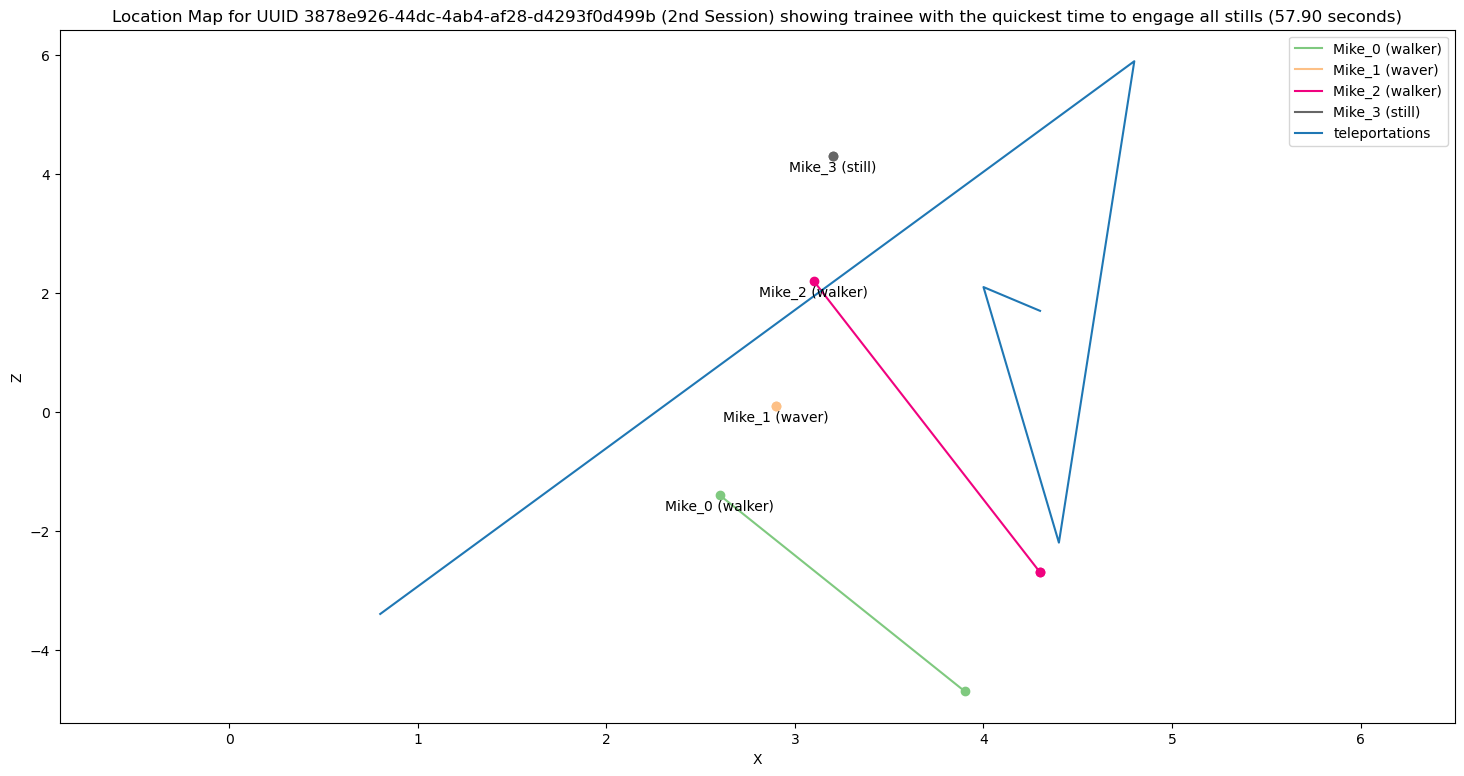

In [8]:

# Get time group with the quickest time to engage all stills
df = still_patients_df.groupby(groupby_columns).filter(
    lambda df: not df.first_engagement.isnull().any()
).groupby(groupby_columns).max().first_engagement.to_frame().reset_index(drop=False).sort_values('first_engagement').head(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing trainee with the quickest time to engage all stills ('
    first_engagement = df.first_engagement.min()
    title += humanize.precisedelta(timedelta(milliseconds=first_engagement)) + ')'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df)